<font face="微软雅黑" size=5 color=#A52A2A > Lesson 5 matplotlib绘图

In [1]:
## 画图必备
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Matplotlib图像构成：Anatomy of a figure

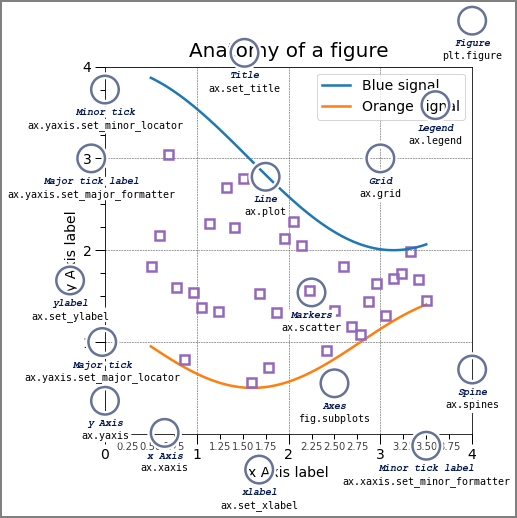

In [3]:
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]


# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='Courier New',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()

# Matplotlib绘图基础

- 直方图
- 散点图
- 图像

(array([ 6., 11., 16., 29., 11., 13., 10.,  3.,  0.,  1.]),
 array([-1.94614741, -1.43100838, -0.91586934, -0.40073031,  0.11440873,
         0.62954776,  1.1446868 ,  1.65982583,  2.17496487,  2.6901039 ,
         3.20524294]),
 <BarContainer object of 10 artists>)

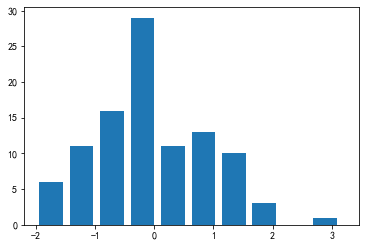

In [3]:
# n_bins = 8
x1 = np.random.randn(100)
fig, ax = plt.subplots()
ax.hist(x1, width = 0.4)
# ax.hist(x1, n_bins)

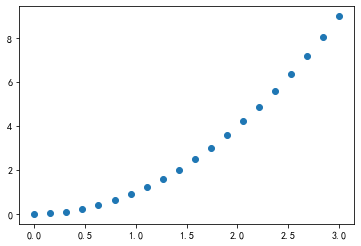

In [4]:
x2 = np.linspace(0, 3, 20)
y2 = x2 ** 2.0
plt.plot(x2, y2, 'o')  # dot plot 

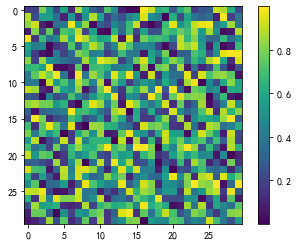

In [5]:
image = np.random.rand(30, 30)
plt.imshow(image)
plt.colorbar()

### Subplots

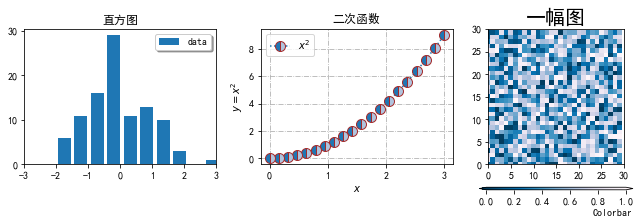

In [22]:
plt.rcParams['font.sans-serif']=['SimHei'] #图中显示中文
plt.rcParams['axes.unicode_minus']=False #正常显示负号
# Relatively complicated colorbar layouts are possible using this paradigm.
# Note that this example works far better with constrained_layout=True

fig, axs = plt.subplots(1, 3, figsize=(9, 3), constrained_layout=True)

ax0 = axs[0].hist(x1
                  , width = 0.4
                  , label = 'data'
#                   , color = 'red'
                 )
axs[0].set_title("直方图")
axs[0].set_xlim(-3, 3)
axs[0].legend(loc='upper right', shadow=True)


ax1 = axs[1].plot(x2, y2, 'o'
                 , label="$x^2$"
                 , linestyle='dotted', linewidth=1.5
                 , markersize=10
                 , fillstyle='left'
                 , markerfacecolor='tab:blue'
                 , markerfacecoloralt='lightsteelblue'
                 , markeredgecolor='brown'
                 )
axs[1].set_title("二次函数")
axs[1].legend(loc='upper left')
axs[1].grid(True, linestyle='-.')
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("$y = x^2$")


ax2 = axs[2].imshow(image
                    , vmin = 0
                    , vmax = 1
                    , cmap='PuBu_r'
                   )
axs[2].set_title("一幅图"
                 , fontsize=20
                )
axs[2].set_xlim(0, 30)
axs[2].set_ylim(0, 30)
axs[2].set_xticks(np.linspace(0, 30, 7))
#plt.xticks(np.linspace(0, 30, 7))
cbar = fig.colorbar(ax2
                    , extend='both'
                    , location='bottom'
                    , pad=0.01, shrink = .8
                    , label='Colorbar'
                   )
cbar.set_label("Colorbar", loc='right')

### 坐标控制 Scales

Text(0.5, 1.0, '坐标自适应数据范围，看起来是圆')

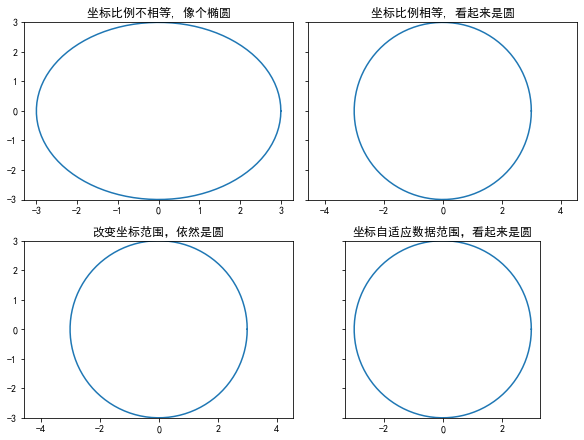

In [3]:
# Plot circle of radius 3.
plt.rcParams['font.sans-serif']=['SimHei'] #图中显示中文
plt.rcParams['axes.unicode_minus']=False #正常显示负号
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharey=True, constrained_layout=True)
#adding constrained_layout=True automatically adjusts.
an = np.linspace(0, 2 * np.pi, 100)

axs[0, 0].plot(3 * np.cos(an), 3 * np.sin(an))
axs[0, 0].set_title('坐标比例不相等, 像个椭圆')

axs[0, 1].plot(3 * np.cos(an), 3 * np.sin(an))
axs[0, 1].axis('equal')
axs[0, 1].set_title('坐标比例相等, 看起来是圆')

axs[1, 0].plot(3 * np.cos(an), 3 * np.sin(an))
axs[1, 0].axis('equal')
axs[1, 0].set(xlim=(-3, 3), ylim=(-3, 3))
axs[1, 0].set_title('改变坐标范围，依然是圆')

axs[1, 1].plot(3 * np.cos(an), 3 * np.sin(an))
axs[1, 1].set_aspect('equal', 'box')
axs[1, 1].set_title('坐标自适应数据范围，看起来是圆')


Text(1, 1000, '$y=x^2$')

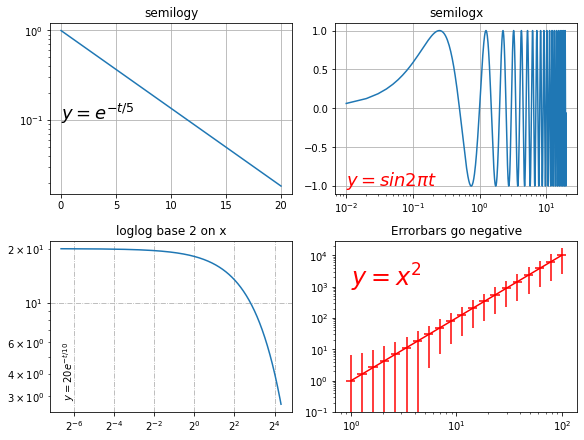

In [47]:
# Data for plotting

t = np.arange(0.01, 20.0, 0.01)

# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True)
# adding constrained_layout=True automatically adjusts.

# log y axis
ax1.semilogy(t, np.exp(-t / 5.0))
ax1.set(title='semilogy')
ax1.grid()
ax1.text(0, 0.1, '$y=e^{-t/5}$', fontsize=18)

# log x axis
ax2.semilogx(t, np.sin(2 * np.pi * t))
ax2.set(title='semilogx')
ax2.text(0.01, -1, '$y=sin{2\pi t}$', fontsize=18, color='red')
ax2.grid()

# log x and y axis
ax3.loglog(t, 20 * np.exp(-t / 10.0))
ax3.set_xscale('log', base=2)
ax3.set(title='loglog base 2 on x')
ax3.text(0.01, 3, '$y=20e^{-t/10}$', rotation='vertical')
ax3.grid(linestyle='-.')

# With errorbars
# Use new data for plotting
x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0

ax4.set_xscale("log")
ax4.set_yscale("log")
ax4.set(title='Errorbars go negative')
ax4.errorbar(x, y, xerr=0.1 * x, yerr=5 + .75 * y, color='red')
# ylim must be set after errorbar to allow errorbar to autoscale limits
ax4.set_ylim(bottom=0.1)
ax4.text(1, 1000, '$y=x^2$', fontsize=24, color='red')

### 

On the matplotlib-users list back in February 2012, Gökhan Sever asked the following question:

Is there a way in matplotlib to partially specify the color of a string?

Example:

plt.ylabel("Today is cloudy.")

How can I show "today" as red, "is" as green and "cloudy." as blue?

Thanks.

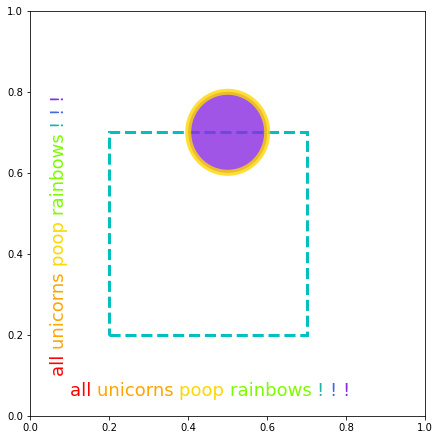

In [23]:
from matplotlib.transforms import Affine2D, offset_copy
#plt.rcParams['font.sans-serif']=['Arial'] #改回英文字体

def rainbow_text(x, y, strings, colors, orientation='horizontal',
                 ax=None, **kwargs):
    """
    Take a list of *strings* and *colors* and place them next to each
    other, with text strings[i] being shown in colors[i].

    Parameters
    ----------
    x, y : float
        Text position in data coordinates.
    strings : list of str
        The strings to draw.
    colors : list of color
        The colors to use.
    orientation : {'horizontal', 'vertical'}
    ax : Axes, optional
        The Axes to draw into. If None, the current axes will be used.
    **kwargs
        All other keyword arguments are passed to plt.text(), so you can
        set the font size, family, etc.
    """
    if ax is None:
        ax = plt.gca()
    t = ax.transData
    fig = ax.figure
    canvas = fig.canvas

    assert orientation in ['horizontal', 'vertical']
    if orientation == 'vertical':
        kwargs.update(rotation=90, verticalalignment='bottom')

    for s, c in zip(strings, colors):
        text = ax.text(x, y, s + " ", color=c, transform=t, **kwargs)

        # Need to draw to update the text position.
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()
        # Convert window extent from pixels to inches
        # to avoid issues displaying at different dpi
        ex = fig.dpi_scale_trans.inverted().transform_bbox(ex)

        if orientation == 'horizontal':
            t = text.get_transform() + \
                offset_copy(Affine2D(), fig=fig, x=ex.width, y=0)
        else:
            t = text.get_transform() + \
                offset_copy(Affine2D(), fig=fig, x=0, y=ex.height)


words = "all unicorns poop rainbows ! ! !".split()
colors = ['red', 'orange', 'gold', 'lawngreen', 'lightseagreen', 'royalblue',
          'blueviolet']
fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
#plt.figure(figsize=(6, 6))
rainbow_text(0.1, 0.05, words, colors, size=18)
rainbow_text(0.05, 0.1, words, colors, orientation='vertical', size=18)
ax.add_patch(plt.Rectangle((.2, .2), .5, .5, ls="--", ec="c", fc="none", linewidth=3))
ax.add_patch(plt.Circle((.5, .7), .1, fc='blueviolet', ec='gold', linewidth=6, alpha=0.8))

In [ ]:
fig.savefig("poop.png", dpi=300, bbox_inches="tight")

# 图像存取
+ matplotlib
+ OpenCV

(1800, 1200, 3)


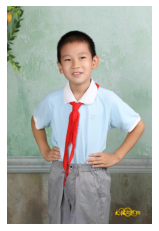

In [176]:
from pathlib import Path
import matplotlib.pyplot as plt
path_to_boy = Path("boy.jpg")
img = plt.imread(path_to_boy)  
plt.imshow(img)
plt.axis('off')
print(img.shape)

In [177]:
type(img)

numpy.ndarray

(-0.5, 1199.5, 1199.5, -0.5)

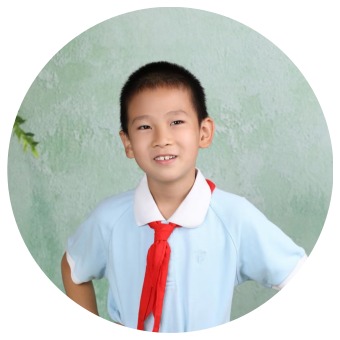

In [178]:
import matplotlib.patches as patches
fig,ax = plt.subplots()
fig.set_size_inches(6,6)
im = ax.imshow(img[0:1200,:])
patch = patches.Circle((600, 600), radius = 600, transform = ax.transData)
im.set_clip_path(patch)
ax.axis('off')


In [179]:
fig.savefig("boy.png",dpi=300,bbox_inches="tight")

In [180]:
import cv2 as cv

img_cv = cv.imread("boy.jpg", 1) 
print(img_cv.shape)

(1800, 1200, 3)


In [181]:
type(img_cv)

numpy.ndarray

In [ ]:
# 打开一个图片文件
cv.imshow("boy", img_cv)
cv.waitKey(0)

In [52]:
img_boy = cv.imread("boy.png") 
print(img_boy.shape)

(1418, 1419, 3)


In [34]:
cv.imshow("boy", img_boy)
cv.waitKey(0)

-1